# Imports & Paths

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [24]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/MSSP607/e.Data/InternetSales.csv"
df = pd.read_csv(data_path,encoding='latin1', low_memory=False)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,CustomerKey,GeographyKey,City,CountryRegionCode,EnglishCountryRegionName,CustomerAlternateKey,Title,FirstName,MiddleName,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,"1,912.15","1,912.15","3,399.99",272.00,85.00,NaN,NaN,1/19/2011,1/31/2011,1/26/2011
1,1,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,"1,265.62","1,265.62","2,319.99",185.60,58.00,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
2,2,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,8.22,8.22,21.98,1.76,0.55,NaN,NaN,1/18/2013,1/30/2013,1/25/2013
3,3,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,"1,481.94","1,481.94","2,384.07",190.73,59.60,NaN,NaN,5/3/2013,5/15/2013,5/10/2013
4,4,11000,26,Rockhampton,AU,Australia,AW00011000,NaN,Jon,V,...,10.84,10.84,28.99,2.32,0.72,NaN,NaN,5/3/2013,5/15/2013,5/10/2013


# Basic information of the Data& clean the dataset

In [25]:
cols = [
    "OrderDate", "EnglishCountryRegionName", "SalesAmount",
    "Gender", "YearlyIncome", "HouseOwnerFlag",
    "EnglishProductName", "UnitPrice", "OrderQuantity", "CustomerKey"
]
df_small = df[cols].copy()

In [26]:
# date translation
df_small["OrderDate"] = pd.to_datetime(df_small["OrderDate"], errors="coerce")
df_small["Year"] = df_small["OrderDate"].dt.year
print(df_small.shape)
df_small.head()

(60398, 11)


,OrderDate,EnglishCountryRegionName,SalesAmount,Gender,YearlyIncome,HouseOwnerFlag,EnglishProductName,UnitPrice,OrderQuantity,CustomerKey,Year
0,2011-01-19,Australia,"3,399.99",M,90000,1,"Mountain-100 Silver, 38","3,399.99",1,11000,2011
1,2013-01-18,Australia,"2,319.99",M,90000,1,"Mountain-200 Silver, 38","2,319.99",1,11000,2013
2,2013-01-18,Australia,21.98,M,90000,1,Fender Set - Mountain,21.98,1,11000,2013
3,2013-05-03,Australia,"2,384.07",M,90000,1,"Touring-1000 Blue, 46","2,384.07",1,11000,2013
4,2013-05-03,Australia,28.99,M,90000,1,Touring Tire,28.99,1,11000,2013


In [27]:
num_cols = ["SalesAmount", "YearlyIncome", "UnitPrice", "OrderQuantity", "HouseOwnerFlag"]
for c in num_cols:
    df_small[c] = pd.to_numeric(df_small[c], errors="coerce")
df_small.head()

,OrderDate,EnglishCountryRegionName,SalesAmount,Gender,YearlyIncome,HouseOwnerFlag,EnglishProductName,UnitPrice,OrderQuantity,CustomerKey,Year
0,2011-01-19,Australia,"3,399.99",M,90000,1,"Mountain-100 Silver, 38","3,399.99",1,11000,2011
1,2013-01-18,Australia,"2,319.99",M,90000,1,"Mountain-200 Silver, 38","2,319.99",1,11000,2013
2,2013-01-18,Australia,21.98,M,90000,1,Fender Set - Mountain,21.98,1,11000,2013
3,2013-05-03,Australia,"2,384.07",M,90000,1,"Touring-1000 Blue, 46","2,384.07",1,11000,2013
4,2013-05-03,Australia,28.99,M,90000,1,Touring Tire,28.99,1,11000,2013


In [28]:
#NA
print(df_small.isna().sum())

OrderDate                   0
EnglishCountryRegionName    0
SalesAmount                 0
Gender                      0
YearlyIncome                0
HouseOwnerFlag              0
EnglishProductName          0
UnitPrice                   0
OrderQuantity               0
CustomerKey                 0
Year                        0
dtype: int64


# Global Internet Sales Trends（Q1）

Question: What are the Internet sales by year for each Country Region?

In [29]:
sales_by_year_country = (
    df_small
    .groupby(['Year', 'EnglishCountryRegionName'], as_index=False)['SalesAmount']
    .sum()
    .sort_values(['Year', 'SalesAmount'], ascending=[True, False])
)
sales_by_year_country.head(10)

,Year,EnglishCountryRegionName,SalesAmount
0,2010,Australia,"20,909.78"
4,2010,United States,"14,833.90"
1,2010,Canada,"3,578.27"
2,2010,France,"3,399.99"
3,2010,United Kingdom,699.10
5,2011,Australia,"2,563,732.25"
10,2011,United States,"2,458,285.17"
6,2011,Canada,"571,571.80"
9,2011,United Kingdom,"550,591.22"
8,2011,Germany,"520,500.16"


pivot table

In [30]:
pivot_sales = sales_by_year_country.pivot(
    index='EnglishCountryRegionName',
    columns='Year',
    values='SalesAmount'
)
pd.options.display.float_format = '{:,.2f}'.format
pivot_sales

Year,2010,2011,2012,2013,2014
EnglishCountryRegionName,,,,,
Australia,"20,909.78","2,563,732.25","2,128,407.46","4,339,443.38","8,507.72"
Canada,"3,578.27","571,571.80","307,604.52","1,085,632.65","9,457.62"
France,"3,399.99","410,845.33","648,065.54","1,578,511.80","3,195.06"
Germany,NaN,"520,500.16","608,657.98","1,761,876.36","3,277.83"
United Kingdom,699.10,"550,591.22","712,700.96","2,124,007.29","3,713.64"
United States,"14,833.90","2,458,285.17","1,437,048.73","5,462,078.86","17,542.85"


Plot all countires internet sales trend by year

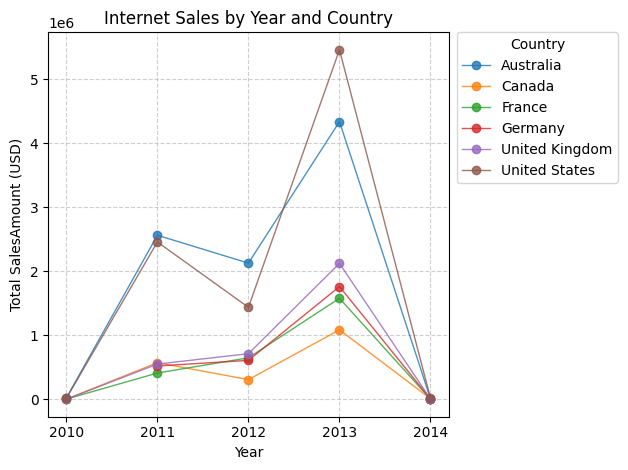

In [31]:
pivot_all = sales_by_year_country.pivot(index='Year',
                                        columns='EnglishCountryRegionName',
                                        values='SalesAmount').sort_index()

ax = pivot_all.plot(marker='o', linewidth=1, alpha=0.8)
ax.set_title("Internet Sales by Year and Country")
ax.set_xlabel("Year")
ax.set_ylabel("Total SalesAmount (USD)")
ax.set_xticks(sorted(df_small['Year'].dropna().unique()))

plt.legend(title='Country', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Income statistics by gender（Q2）

    Question：Generate summary statistics including min, max, std for Yearly Income, Gender by Country Regions.

In [32]:
income_stats = (
    df_small.dropna(subset=["YearlyIncome"])
            .groupby(["EnglishCountryRegionName", "Gender"])["YearlyIncome"]
            .agg(min="min", max="max", mean="mean", std="std", count="count")
            .reset_index()
)

pd.options.display.float_format = '{:,.2f}'.format
income_stats.sort_values(["EnglishCountryRegionName", "Gender"]).head(20)

,EnglishCountryRegionName,Gender,min,max,mean,std,count
0,Australia,F,10000,160000,"67,060.58","30,613.96",6685
1,Australia,M,10000,170000,"65,412.91","32,550.78",6660
2,Canada,F,10000,170000,"58,651.32","19,435.16",3648
3,Canada,M,10000,170000,"61,460.22","22,702.85",3972
4,France,F,10000,110000,"39,367.13","28,421.84",2781
5,France,M,10000,110000,"39,805.55","28,665.66",2777
6,Germany,F,10000,130000,"48,287.23","37,622.81",2820
7,Germany,M,10000,130000,"46,730.84","37,487.62",2805
8,United Kingdom,F,10000,170000,"56,518.67","51,130.69",3401
9,United Kingdom,M,10000,170000,"55,771.75","50,963.71",3505


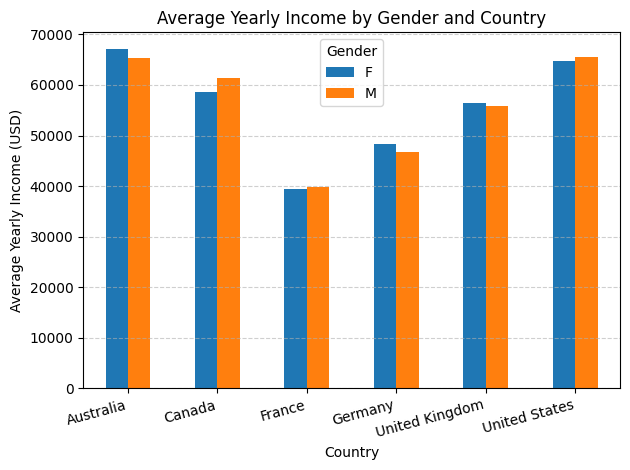

In [33]:
income_plot = (
    income_stats
    .sort_values(["EnglishCountryRegionName", "Gender"])
    .pivot(index="EnglishCountryRegionName", columns="Gender", values="mean")
)

income_plot.plot(kind="bar")
plt.title("Average Yearly Income by Gender and Country")
plt.xlabel("Country")
plt.ylabel("Average Yearly Income (USD)")
plt.xticks(rotation=15, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# product category generates the most sales（Q3）

Question：What is the average price of the product category that generates the most sales?

In [34]:
# Price of products
product_sales = (
    df_small
    .groupby('EnglishProductName', as_index=False)
    .agg({
        'SalesAmount': 'sum',
        'UnitPrice': 'mean'
    })
    .sort_values('SalesAmount', ascending=False)
)

# Top product
top_product = product_sales.iloc[0]['EnglishProductName']
top_sales_amount = product_sales.iloc[0]['SalesAmount']
# Average price of the top 1
avg_price_top = df_small.loc[df_small['EnglishProductName'] == top_product, 'UnitPrice'].mean()

print(f"Top product: {top_product}")
print(f"Total sales amount: ${top_sales_amount:,.2f}")
print(f"Average unit price: ${avg_price_top:,.2f}")

# Top 10 products
top10_products = product_sales.head(10)
print(top10_products)
top10_df = df[df['EnglishProductName'].isin(top10_products['EnglishProductName'])]
# average price of top 10
avg_price_top10 = top10_df['UnitPrice'].mean()
print(f"Average Unit Price of Top 10 Products: ${avg_price_top10:,.2f}")

Top product: Mountain-200 Black, 46
Total sales amount: $1,373,469.55
Average unit price: $2,215.27
         EnglishProductName  SalesAmount  UnitPrice
34   Mountain-200 Black, 46 1,373,469.55   2,215.27
33   Mountain-200 Black, 42 1,363,142.09   2,220.10
35  Mountain-200 Silver, 38 1,339,462.79   2,247.42
37  Mountain-200 Silver, 46 1,301,100.10   2,243.28
32   Mountain-200 Black, 38 1,294,866.14   2,224.86
36  Mountain-200 Silver, 42 1,257,434.57   2,245.42
58         Road-150 Red, 48 1,205,876.99   3,578.27
61         Road-150 Red, 62 1,202,298.72   3,578.27
59         Road-150 Red, 52 1,080,637.54   3,578.27
60         Road-150 Red, 56 1,055,589.65   3,578.27
Average Unit Price of Top 10 Products: $2,586.87


In [35]:
df_small['EnglishProductName'].nunique()

130

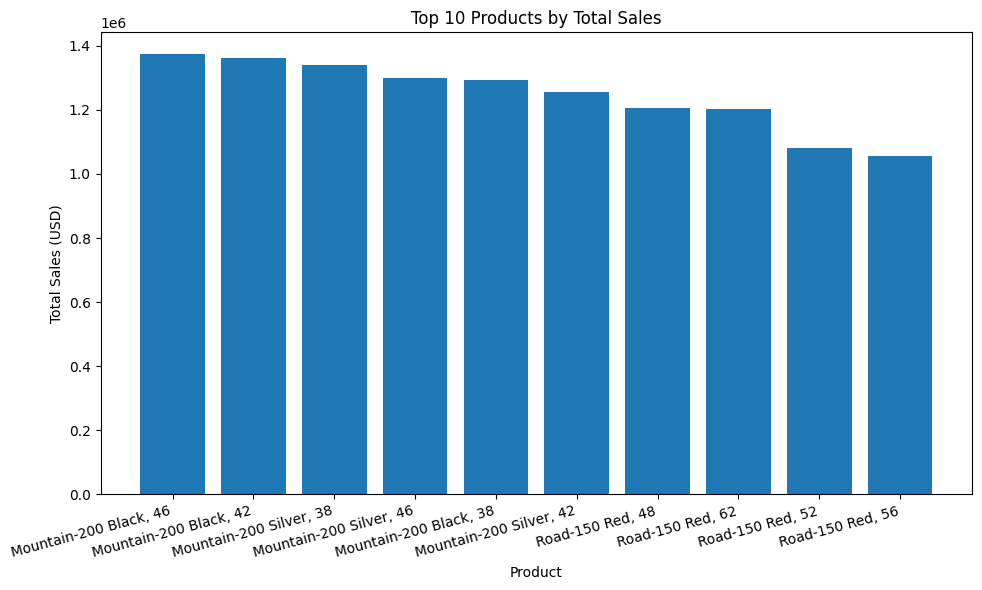

In [36]:
top10_products = product_sales.head(10).sort_values('SalesAmount', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(top10_products['EnglishProductName'], top10_products['SalesAmount'])
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# Housing ownership and sales relationship（Q4）
Question：Does owning a home make a difference in sales?

In [40]:
import numpy as np
from scipy import stats

# group by HouseOwnerFlag
home_sales = df_small.loc[df_small['HouseOwnerFlag'] == 1, 'SalesAmount'].dropna()
nonhome_sales = df_small.loc[df_small['HouseOwnerFlag'] == 0, 'SalesAmount'].dropna()

# log
home_sales_log = np.log(home_sales + 1e-6)
nonhome_sales_log = np.log(nonhome_sales + 1e-6)

# Welch’s t test
t_stat, p_val = stats.ttest_ind(
    home_sales_log,
    nonhome_sales_log,
    equal_var=False
)

print(f"T-statistic: {t_stat:.3f},  p-value: {p_val:.4f}")

T-statistic: 1.313,  p-value: 0.1891
